In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import os
os.chdir("/Users/rucheekkashyap/Downloads/adult")

In [3]:
cols = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","<=50K"]

In [4]:
len(cols)

15

In [5]:
df = pd.read_csv("adult.data", names=cols,skipinitialspace=True).reset_index(drop=True)

In [6]:
df.shape

(32561, 15)

In [7]:
num_cols=list(df.describe().columns)

In [8]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

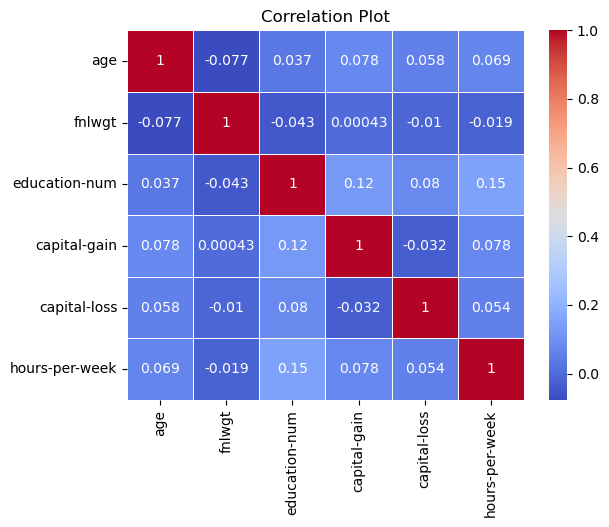

In [9]:
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Correlation Plot")
plt.show()

From the correlation plot, we can conclude that the numerical variables don't have any significant correlation between each other. Age exhibits minor positive correlations with capital-gain, capital-loss, and hours-per-week, and a slight positive link with education-num. Conversely, it exhibits a weak negative connection with fnlwgt. Fnlwgt, in turn, shows very weak negative correlations with education-num, capital-loss, and hours-per-week, while having negligible correlation with capital-gain. Education-num displays minor positive relationship with age, capital-gain, and hours-per-week but weak negative correlations with fnlwgt. Capital-gain has weak positive links with age and education-num, while capital-loss shows a weak positive correlation with hours-per-week and very weak connections with other variables. These weak correlations suggest that linear relationships between these attributes are very less significant.

In [10]:
df[df.values=="?"]=np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  <=50K           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df['<=50K']=df['<=50K'].map({'<=50K': 0, '>50K': 1})

In [13]:
df["<=50K"].unique()

array([0, 1])

In [14]:
print(df["education"].nunique())
print(df["education-num"].nunique())

16
16


In [15]:
print(df["education"].unique())
print(df["race"].unique())

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


In [17]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,School,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,School,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,School,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [16]:
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th','12th',"HS-grad"],'School', inplace = True)
df['education'].replace(["Assoc-acdm","Assoc-voc"],'Assoc', inplace = True)

In [17]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [18]:
from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital-status', 'occupation', 'relationship','race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = df['<=50K']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred_test_lr = logreg.predict(x_test)
y_pred_train_lr = logreg.predict(x_train)

In [21]:
from sklearn.metrics import average_precision_score,precision_recall_curve,precision_score,precision_recall_fscore_support,accuracy_score,f1_score
from sklearn.preprocessing import MultiLabelBinarizer

import numpy as np
import pandas as pd
import os
import re
import joblib

def PERFORMANCE(predictions,actuals,cut_off=0.5):
	if issubclass(predictions.dtype.type, np.floating):
		predictions=(predictions>=cut_off).astype('int')
	performance=[accuracy_score(actuals,predictions),*precision_recall_fscore_support(actuals,predictions,pos_label=1,average="binary")[:-1]]
	return performance

def all_performance_metrics(performance_input, model_name='-',csv_path=None,cut=0.5):
	y,pred,data_,=performance_input
	performance=PERFORMANCE(pred,y,cut_off=cut)
	#
	perf=[
	[model_name,data_]+performance,
	]
	columns=['model_name','data','accuracy','precision','recall','f1_score']
	perf_df=pd.DataFrame(perf,columns=columns)
	if csv_path is not None:
		perf_df.to_csv(csv_path, mode='a', header=not os.path.isfile(csv_path),index=False)
	else:
		return perf_df

In [22]:
all_performance_metrics((y_train,y_pred_train_lr,"train"),"LogisticRegression")

,model_name,data,accuracy,precision,recall,f1_score
0,LogisticRegression,train,0.809714,0.692775,0.374521,0.486198


In [23]:
all_performance_metrics((y_test,y_pred_test_lr,"test"),"LogisticRegression")

,model_name,data,accuracy,precision,recall,f1_score
0,LogisticRegression,test,0.813389,0.710383,0.385267,0.499588


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50,60,70,80,100],
             'max_depth': [3,4,6]
             }
estimator = RandomForestClassifier()
rf = GridSearchCV(estimator=estimator, param_grid=param_grid,scoring='f1')
rf.fit(x_train, y_train)

y_pred_test_rf = rf.predict(x_test)
y_pred_train_rf = rf.predict(x_train)

In [25]:
all_performance_metrics((y_train,y_pred_train_rf,"train"),"RandomForestClassifier")

,model_name,data,accuracy,precision,recall,f1_score
0,RandomForestClassifier,train,0.85688,0.80512,0.533857,0.642011


In [26]:
all_performance_metrics((y_test,y_pred_test_rf,"test"),"RandomForestClassifier")

,model_name,data,accuracy,precision,recall,f1_score
0,RandomForestClassifier,test,0.855973,0.791336,0.549111,0.648338


In [27]:
# !pip install xgboost

In [28]:
from xgboost import XGBClassifier
param_grid = {'n_estimators': [50,60,70,80,100],
             'max_depth': [3,4,6],
             'learning_rate': [0.1,0.05,0.01,0.2],
             }
estimator = XGBClassifier()
xgb = GridSearchCV(estimator=estimator, param_grid=param_grid,scoring='f1')
xgb.fit(x_train, y_train)

y_pred_test_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)

In [29]:
all_performance_metrics((y_train,y_pred_train_xgb,"train"),"XGBClassifier")

,model_name,data,accuracy,precision,recall,f1_score
0,XGBClassifier,train,0.901106,0.844037,0.72203,0.778281


In [30]:
all_performance_metrics((y_test,y_pred_test_xgb,"test"),"XGBClassifier")

,model_name,data,accuracy,precision,recall,f1_score
0,XGBClassifier,test,0.870611,0.769118,0.664268,0.712858


In [31]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("RF",rf),("XGB",xgb)])
vc.fit(x_train, y_train)

y_pred_test_vc = vc.predict(x_test)
y_pred_train_vc = vc.predict(x_train)

In [32]:
all_performance_metrics((y_train,y_pred_train_vc,"train"),"XGBClassifier")

,model_name,data,accuracy,precision,recall,f1_score
0,XGBClassifier,train,0.863943,0.879387,0.503011,0.639963


In [33]:
all_performance_metrics((y_test,y_pred_test_vc,"test"),"XGBClassifier")

,model_name,data,accuracy,precision,recall,f1_score
0,XGBClassifier,test,0.856587,0.839097,0.503387,0.629267
